# Model 1 - Horizontal stratigraphic

This is the most simpel model of horizontally stacked layers. We start by importing the necessary dependencies:

In [1]:
# These two lines are necessary only if GemPy is not installed
import sys, os
sys.path.append("../..")

# Importing GemPy
import gempy as gp

# Embedding matplotlib figures in the notebooks
%matplotlib inline

# Importing auxiliary libraries
import numpy as np
import matplotlib.pyplot as plt

Creating the model by importing the input data and displaying it:

In [32]:
geo_data = gp.create_data([0,1000,0,50,0,1000],resolution=[50,1,50], 
                        path_o = os.pardir+"/data/input_data/jan_models/model1_orientations.csv",
                        path_i = os.pardir+"/data/input_data/jan_models/model1_surface_points.csv") 

Active grids: ['regular']


In [33]:
geo_data.get_data()

X    Y    Z     X_r     Y_r     Z_r surface  \
surface_points 0   100  200  600  0.2501  0.3126  0.5626   rock2   
               1   500  200  600  0.5001  0.3126  0.5626   rock2   
               2   900  200  600  0.7501  0.3126  0.5626   rock2   
               3   100  800  600  0.2501  0.6876  0.5626   rock2   
               4   500  800  600  0.5001  0.6876  0.5626   rock2   
               5   900  800  600  0.7501  0.6876  0.5626   rock2   
               6   100  200  400  0.2501  0.3126  0.4376   rock1   
               7   500  200  400  0.5001  0.3126  0.4376   rock1   
               8   900  200  400  0.7501  0.3126  0.4376   rock1   
               9   100  800  400  0.2501  0.6876  0.4376   rock1   
               10  500  800  400  0.5001  0.6876  0.4376   rock1   
               11  900  800  400  0.7501  0.6876  0.4376   rock1   
orientations   0   500  500  600  0.5001  0.5001  0.5626   rock2   
               1   500  500  400  0.5001  0.5001  0.4376   rock1   

                           series  id  order_series        smooth  \
surface_points 0   Default series   1             1  1.000000e-08   
               1   Default series   1             1  1.000000e-08   
               2   Default series   1             1  1.000000e-08   
               3   Default series   1             1  1.000000e-08   
               4   Default series   1             1  1.000000e-08   
               5   Default series   1             1  1.000000e-08   
               6   Default series   2             1  1.000000e-08   
               7   Default series   2             1  1.000000e-08   
               8   Default series   2             1  1.000000e-08   
               9   Default series   2             1  1.000000e-08   
               10  Default series   2             1  1.000000e-08   
               11  Default series   2             1  1.000000e-08   
orientations   0   Default series   1             1  1.000000e-02   
               1   Default series   2             1  1.000000e-02   

                            G_x           G_y  G_z  dip  azimuth  polarity  
surface_points 0            NaN           NaN  NaN  NaN      NaN       NaN  
               1            NaN           NaN  NaN  NaN      NaN       NaN  
               2            NaN           NaN  NaN  NaN      NaN       NaN  
               3            NaN           NaN  NaN  NaN      NaN       NaN  
               4            NaN           NaN  NaN  NaN      NaN       NaN  
               5            NaN           NaN  NaN  NaN      NaN       NaN  
               6            NaN           NaN  NaN  NaN      NaN       NaN  
               7            NaN           NaN  NaN  NaN      NaN       NaN  
               8            NaN           NaN  NaN  NaN      NaN       NaN  
               9            NaN           NaN  NaN  NaN      NaN       NaN  
               10           NaN           NaN  NaN  NaN      NaN       NaN  
               11           NaN           NaN  NaN  NaN      NaN       NaN  
orientations   0   1.000000e-12  1.000000e-12  1.0  0.0     90.0       1.0  
               1   1.000000e-12  1.000000e-12  1.0  0.0     90.0       1.0

Setting and ordering the units and series:

In [34]:
gp.map_series_to_surfaces(geo_data, {"Strat_Series": ('rock2','rock1'),"Basement_Series":('basement')})

,surface,series,order_surfaces,isBasement,color,id
0,rock2,Strat_Series,1,False,#015482,1
1,rock1,Strat_Series,2,False,#9f0052,2
2,basement,Basement_Series,1,True,#ffbe00,3


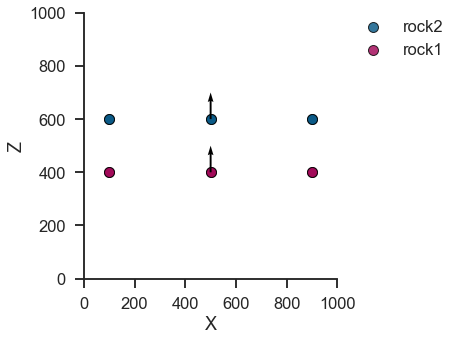

In [35]:
%matplotlib inline
gp.plot.plot_data(geo_data, direction='y')

Calculating the model:

In [36]:
interp_data = gp.set_interpolation_data(geo_data, compile_theano=True,
                                        theano_optimizer='fast_compile')

Compiling theano function...
Compilation Done!


In [37]:
interp_data.theano_graph.number_of_points_per_surface_T.get_value()

array([5, 5])

In [38]:
sol = gp.compute_model(geo_data)

../..\gempy\core\solution.py:258: UserWarning: Surfaces not computed due to: marching_cubes_lewiner() got an unexpected keyword argument 'mask'
  warnings.warn('Surfaces not computed due to: ' + str(e))


Displaying the result in x and y direction:

C:\Users\Jan\Anaconda3\envs\gempy_env\lib\site-packages\seaborn\axisgrid.py:375: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()
C:\Users\Jan\Anaconda3\envs\gempy_env\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout()


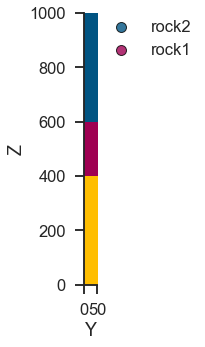

In [39]:
%matplotlib inline
gp.plot.plot_section(geo_data, cell_number=25,
                         direction='x', show_data=True)

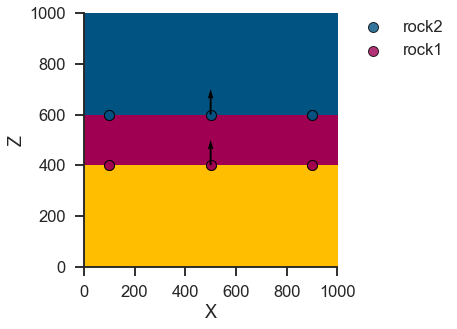

In [42]:
%matplotlib inline
gp.plot.plot_section(geo_data, cell_number=0,
                    direction='y', show_data=True)

In [43]:
geo_data.grid.values[:,1].min()
geo_data.grid.values[:,1].max()

geo_data.grid.regular_grid.extent

array([   0., 1000.,    0.,   50.,    0., 1000.])

In [44]:
import gempy as gp
from gempy.utils import kriging

In [147]:
test_data = np.array([[100,0,500,20],[900,0,500,10],[500,0,550,10]])

In [148]:
kriging_model = kriging.kriging_model(model=sol, domain=[2],data=test_data)

In [149]:
kriging_model.range_=500

In [150]:
kriging_model.data_df

,X,Y,Z,property
0,100,0,500,20
1,900,0,500,10
2,500,0,550,10


In [151]:
kriging_model.create_kriged_field()

In [152]:
kriging_model.results_df.head()

,X,Y,Z,est_value,est_variance
0,10.0,0.5,410.0,17.774568,5.494539
1,10.0,0.5,430.0,17.925873,5.191603
2,10.0,0.5,450.0,18.055174,4.928754
3,10.0,0.5,470.0,18.150059,4.730025
4,10.0,0.5,490.0,18.197559,4.620774


In [153]:
x = kriging_model.results_df['X'].values
y = kriging_model.results_df['Z'].values
prop = kriging_model.results_df['est_value'].values
var = kriging_model.results_df['est_variance'].values

(10.0, 990.0, 410.0, 590.0)

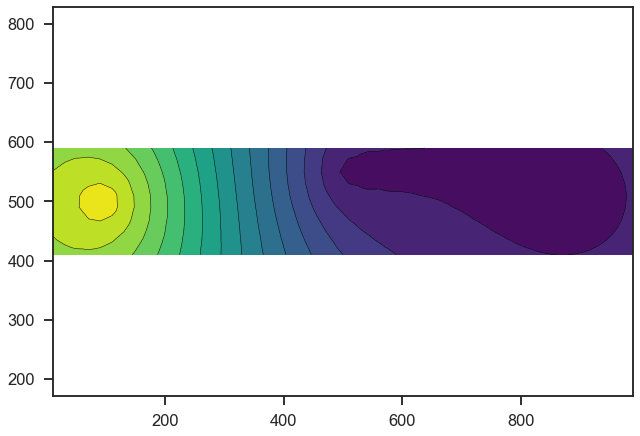

In [154]:
import matplotlib.tri as tri
import matplotlib.pyplot as plt

plt.tricontour(x, y, prop, 15, linewidths=0.5, colors='k')
plt.tricontourf(x, y, prop, 15, cmap='viridis')
plt.axis('equal')

(10.0, 990.0, 410.0, 590.0)

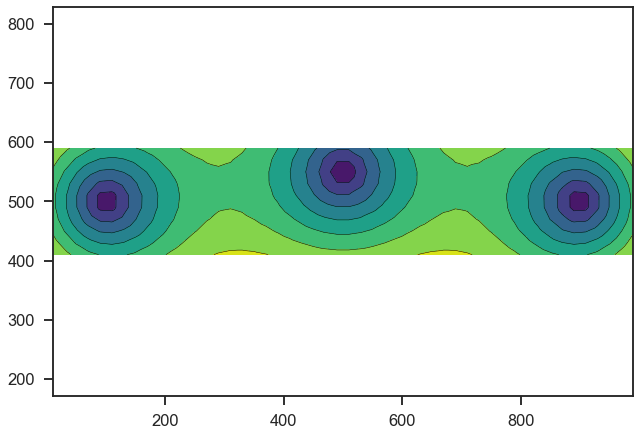

In [155]:
plt.tricontour(x, y, var, 7, linewidths=0.5, colors='k')
plt.tricontourf(x, y, var, 7, cmap='viridis')
plt.axis('equal')